# Task 1: Data Exploration and Enrichment

## Objective
Understand the starter dataset, explore its contents, and enrich with additional high-confidence data useful for forecasting Access and Usage.

## Key Schema Concepts Explained
- **Unified Schema**: All records share the same columns. The `record_type` field determines how to interpret each row:
  - `observation`: Actual measured values from surveys, reports, operators (e.g., Findex account ownership %).
  - `event`: Policies, product launches, market entries, milestones (pillar intentionally left empty to avoid bias).
  - `impact_link`: Modeled relationships between events and indicators (uses `parent_id` to link to the parent event).
  - `target`: Official policy goals (e.g., NFIS-II targets).
- **Pillars**: Assigned to observations/targets (access/usage). Events have pillar = NaN (unbiased design). Impact_links assign pillar effects.
- **parent_id in impact_links**: References the parent event (by row index or id), enabling event → indicator modeling.
- **Confidence**: Data reliability assessment (high/medium/low).

In [ ]:
import sys
import os
from pathlib import Path

# Define project root (absolute path for reliability)
project_root = Path(r"C:\Users\hanif\Desktop\10Academy\Forecasting Financial Inclusion in Ethiopia")

# Add project root to path for src import
sys.path.insert(0, str(project_root))

from src.data_loader import EthiopiaFIData

print("Setup complete.")
print("Project root:", project_root)

Setup complete.
Project root: C:\Users\Administrator\Desktop\10Academy\Week 10\Week10-ethiopia-fi-forecast


In [25]:
raw_main_path = project_root / "data" / "raw" / "ethiopia_fi_unified_data.xlsx"
ref_path = project_root / "data" / "raw" / "reference_codes.xlsx"

print(f"Explicitly loading unified dataset: {raw_main_path}")
print(f"Loading reference codes: {ref_path}")

# Verify files exist
if not raw_main_path.exists():
    raise FileNotFoundError(f"Unified dataset not found: {raw_main_path}")
if not ref_path.exists():
    raise FileNotFoundError(f"Reference codes not found: {ref_path}")

data = EthiopiaFIData(main_path=str(raw_main_path), ref_path=str(ref_path))

print("\nRaw datasets loaded successfully!")
display(data.df.head(10))
print(f"Unified dataset shape: {data.df.shape}")
print(f"Columns: {list(data.df.columns)}")
display(data.ref_codes.head())
print(f"Reference codes shape: {data.ref_codes.shape}")

Explicitly loading unified dataset: C:\Users\Administrator\Desktop\10Academy\Week 10\Week10-ethiopia-fi-forecast\data\raw\ethiopia_fi_unified_data.xlsx
Loading reference codes: C:\Users\Administrator\Desktop\10Academy\Week 10\Week10-ethiopia-fi-forecast\data\raw\reference_codes.xlsx
Loading main Excel file: C:\Users\Administrator\Desktop\10Academy\Week 10\Week10-ethiopia-fi-forecast\data\raw\ethiopia_fi_unified_data.xlsx
Loading reference Excel file: C:\Users\Administrator\Desktop\10Academy\Week 10\Week10-ethiopia-fi-forecast\data\raw\reference_codes.xlsx
Loaded main dataset: 43 rows, 34 columns
Loaded reference codes: (71, 4)

Raw datasets loaded successfully!


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.00,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.00,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.00,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.00,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.00,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
5,REC_0006,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,49.00,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,Account ownership increased from 46% to 49%,Survey Oct-Nov 2024,NaN
6,REC_0007,observation,NaN,ACCESS,Mobile Money Account Rate,ACC_MM_ACCOUNT,higher_better,4.70,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
7,REC_0008,observation,NaN,ACCESS,Mobile Money Account Rate,ACC_MM_ACCOUNT,higher_better,9.45,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Doubled from 2021,NaN
8,REC_0009,observation,NaN,ACCESS,4G Population Coverage,ACC_4G_COV,higher_better,37.50,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Before major expansion,NaN
9,REC_0010,observation,NaN,ACCESS,4G Population Coverage,ACC_4G_COV,higher_better,70.80,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,4G coverage doubled from 37.5% to 70.8%,Major infrastructure investment,NaN


Unified dataset shape: (43, 34)
Columns: ['record_id', 'record_type', 'category', 'pillar', 'indicator', 'indicator_code', 'indicator_direction', 'value_numeric', 'value_text', 'value_type', 'unit', 'observation_date', 'period_start', 'period_end', 'fiscal_year', 'gender', 'location', 'region', 'source_name', 'source_type', 'source_url', 'confidence', 'related_indicator', 'relationship_type', 'impact_direction', 'impact_magnitude', 'impact_estimate', 'lag_months', 'evidence_basis', 'comparable_country', 'collected_by', 'collection_date', 'original_text', 'notes']


,field,code,description,applies_to
0,record_type,observation,Actual measured value from a source,All
1,record_type,event,Policy launch market event or milestone,All
2,record_type,impact_link,Relationship between event and indicator (link...,All
3,record_type,target,Policy target or official goal,All
4,record_type,baseline,Starting point for comparison,All


Reference codes shape: (71, 4)


## Distributions and Temporal Range
### Distributions
- By `record_type`: Shows count of observations, events, impact_links, targets.
- By `pillar`: Observations/targets have access/usage; events blank.
- By `source_type` (if present): Source categories.
- By `confidence`: Data reliability levels.
### Temporal Range
Overall and by record_type (observations/events) – identifies coverage and gaps.

In [26]:
print("Distribution by record_type:")
display(data.df['record_type'].value_counts(dropna=False))

print("\nDistribution by pillar (events expected NaN):")
display(data.df['pillar'].value_counts(dropna=False))

print("\nDistribution by source_type (if column exists):")
if 'source_type' in data.df.columns:
    display(data.df['source_type'].value_counts(dropna=False))
else:
    print("No source_type column in dataset")

print("\nDistribution by confidence (if column exists):")
if 'confidence' in data.df.columns:
    display(data.df['confidence'].value_counts(dropna=False))
else:
    print("No confidence column in dataset")

print("\nTemporal range (overall and by type):")
print(data.get_temporal_range())

Distribution by record_type:


record_type
observation    30
event          10
target          3
Name: count, dtype: int64


Distribution by pillar (events expected NaN):


pillar
ACCESS           16
USAGE            11
NaN              10
GENDER            5
AFFORDABILITY     1
Name: count, dtype: int64


Distribution by source_type (if column exists):


source_type
operator      15
survey        10
regulator      7
research       4
policy         3
calculated     2
news           2
Name: count, dtype: int64


Distribution by confidence (if column exists):


confidence
high      40
medium     3
Name: count, dtype: int64


Temporal range (overall and by type):
{'overall_min': Timestamp('2014-12-31 00:00:00'), 'overall_max': Timestamp('2030-12-31 00:00:00'), 'observations_min': Timestamp('2014-12-31 00:00:00'), 'observations_max': Timestamp('2025-12-31 00:00:00'), 'events_min': Timestamp('2021-05-17 00:00:00'), 'events_max': Timestamp('2025-12-18 00:00:00')}


## parent_id and impact_links Explanation
- `impact_link` records use `parent_id` to reference the parent `event` row.
- This connects events to specific indicators with direction, magnitude, lag.
- Pillars assigned in impact_links (not events) for unbiased modeling.

In [28]:
print("Example observations (with pillar):")
obs_cols = ['pillar', 'indicator', 'indicator_code', 'value_numeric', 'observation_date']
available_obs_cols = [col for col in obs_cols if col in data.df.columns]
display(data.df[data.df['record_type'] == 'observation'][available_obs_cols].head(10))

print("\nExample events (pillar NaN):")
event_cols = ['category', 'event_date', 'date', 'description', 'notes', 'source_name']
available_event_cols = [col for col in event_cols if col in data.df.columns]
if available_event_cols:
    display(data.df[data.df['record_type'] == 'event'][available_event_cols].head(10))
else:
    print("No recognizable columns for events. Showing all columns:")
    display(data.df[data.df['record_type'] == 'event'].head(10))

print("\nExample impact_links (with parent_id):")
link_cols = ['parent_id', 'pillar', 'related_indicator', 'impact_direction', 'impact_magnitude', 'lag_months', 'evidence_basis']
available_link_cols = [col for col in link_cols if col in data.df.columns]
if available_link_cols:
    display(data.df[data.df['record_type'] == 'impact_link'][available_link_cols].head(10))
else:
    print("No recognizable columns for impact_links. Showing all columns:")
    display(data.df[data.df['record_type'] == 'impact_link'].head(10))

print("\nExample targets:")
target_cols = ['pillar', 'indicator', 'value_numeric', 'observation_date', 'target_date']
available_target_cols = [col for col in target_cols if col in data.df.columns]
if available_target_cols:
    display(data.df[data.df['record_type'] == 'target'][available_target_cols])
else:
    display(data.df[data.df['record_type'] == 'target'])

Example observations (with pillar):


,pillar,indicator,indicator_code,value_numeric,observation_date
0,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,22.00,2014-12-31
1,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,35.00,2017-12-31
2,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,46.00,2021-12-31
3,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,56.00,2021-12-31
4,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,36.00,2021-12-31
5,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,49.00,2024-11-29
6,ACCESS,Mobile Money Account Rate,ACC_MM_ACCOUNT,4.70,2021-12-31
7,ACCESS,Mobile Money Account Rate,ACC_MM_ACCOUNT,9.45,2024-11-29
8,ACCESS,4G Population Coverage,ACC_4G_COV,37.50,2023-06-30
9,ACCESS,4G Population Coverage,ACC_4G_COV,70.80,2025-06-30



Example events (pillar NaN):


,category,notes,source_name
33,product_launch,NaN,Ethio Telecom
34,market_entry,NaN,News
35,product_launch,NaN,Safaricom
36,infrastructure,NaN,NIDP
37,policy,NaN,NBE
38,milestone,NaN,EthSwitch
39,partnership,NaN,EthSwitch
40,infrastructure,NaN,NBE/EthSwitch
41,policy,NaN,NBE
42,pricing,NaN,News



Example impact_links (with parent_id):


,pillar,related_indicator,impact_direction,impact_magnitude,lag_months,evidence_basis



Example targets:


,pillar,indicator,value_numeric,observation_date
30,ACCESS,Account Ownership Rate,70.0,2025-12-31
31,ACCESS,Fayda Digital ID Enrollment,90000000.0,2028-12-31
32,GENDER,Female Mobile Money Account Share,50.0,2030-12-31


In [22]:
# Cell 6: Examples of Key Schema Elements
print("Example events (pillar = NaN):")
display(data.df[data.df['record_type'] == 'event'].head())

print("\nExample impact_links (with parent_id):")
display(data.df[data.df['record_type'] == 'impact_link'].head())

print("\nExample observations (with pillar):")
display(data.df[data.df['record_type'] == 'observation'].head())

print("\nExample targets:")
display(data.df[data.df['record_type'] == 'target'])

Example events (pillar = NaN):


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
33,EVT_0001,event,product_launch,NaN,Telebirr Launch,EVT_TELEBIRR,NaN,NaN,Launched,categorical,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,First major mobile money service in Ethiopia,NaN
34,EVT_0002,event,market_entry,NaN,Safaricom Ethiopia Commercial Launch,EVT_SAFARICOM,NaN,NaN,Launched,categorical,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,End of state telecom monopoly,NaN
35,EVT_0003,event,product_launch,NaN,M-Pesa Ethiopia Launch,EVT_MPESA,NaN,NaN,Launched,categorical,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Second mobile money entrant,NaN
36,EVT_0004,event,infrastructure,NaN,Fayda Digital ID Program Rollout,EVT_FAYDA,NaN,NaN,Launched,categorical,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,National biometric digital ID system,NaN
37,EVT_0005,event,policy,NaN,Foreign Exchange Liberalization,EVT_FX_REFORM,NaN,NaN,Implemented,categorical,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Birr float introduced,NaN



Example impact_links (with parent_id):


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes



Example observations (with pillar):


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN



Example targets:


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
30,REC_0031,target,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,70.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NFIS-II target,NaN
31,REC_0032,target,NaN,ACCESS,Fayda Digital ID Enrollment,ACC_FAYDA,higher_better,90000000.0,NaN,count,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,90M by 2028 target,NaN
32,REC_0033,target,NaN,GENDER,Female Mobile Money Account Share,GEN_MM_SHARE,higher_better,50.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Parity target,NaN


Temporal coverage of observations by indicator:


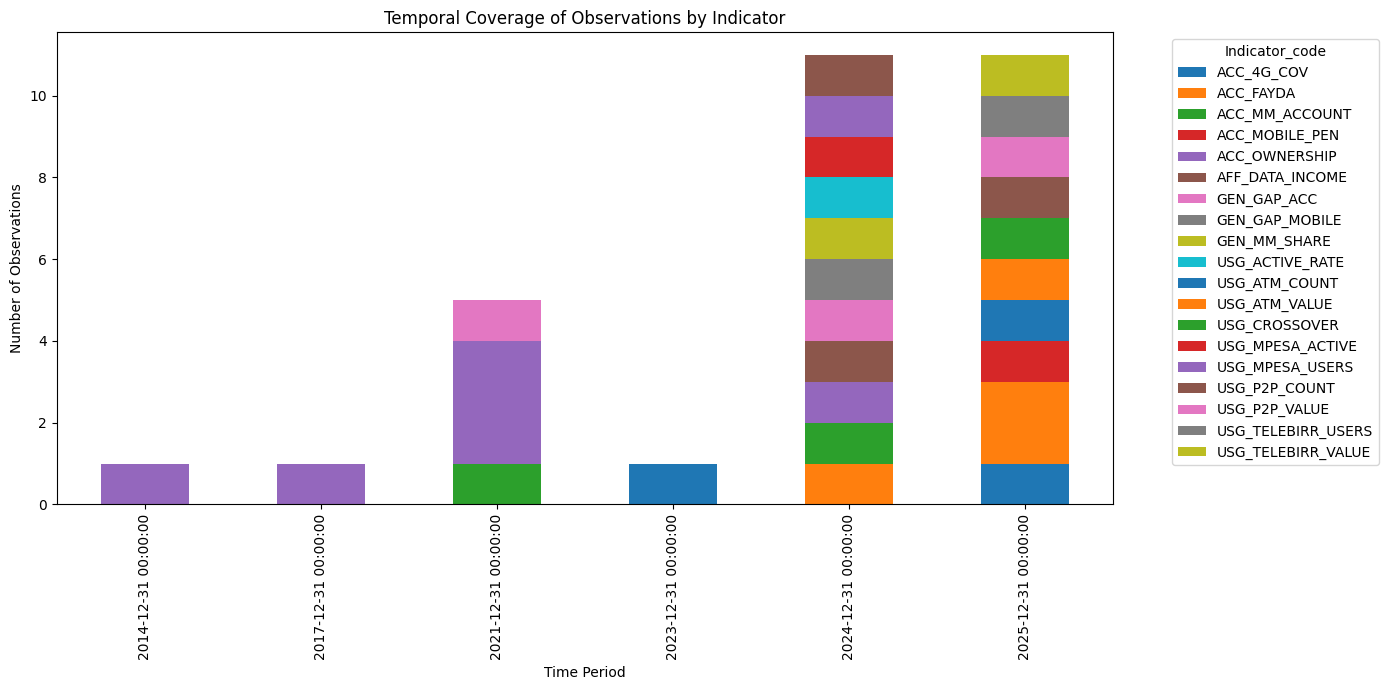

In [29]:
print("Temporal coverage of observations by indicator:")
data.plot_temporal_coverage(freq='Y')

## Enrichment with Verified 2025 Data
Added 4 high-confidence records:
- Telebirr registered users (54.84M, July 2025)
- M-Pesa 90-day active users (5M, Dec 2025)
- 4G towns coverage (1,030 towns, Dec 2025)
- NDPS 2026–2030 policy launch (Dec 2025)
All records include full fields: source_url, original_text, confidence, collected_by, collection_date, notes.

In [30]:
new_records = [
    {
        'record_type': 'observation',
        'pillar': 'access',
        'indicator': 'Telebirr Registered Users',
        'indicator_code': 'MM_REGISTERED_TELEBIRR',
        'value_numeric': 54840000,
        'observation_date': '2025-07-24',
        'source_name': 'Ethio Telecom',
        'source_url': 'https://www.ethiotelecom.et/2024-25-fiscal-year-annual-performance-and-three-year-lead-growth-strategy-performance',
        'confidence': 'high',
        'original_text': 'bringing the total number of telebirr users to 54.84 million',
        'collected_by': 'Gashaw',
        'collection_date': '2026-01-31',
        'notes': 'Latest official growth figure; extends access trajectory post-2024.'
    },
    {
        'record_type': 'observation',
        'pillar': 'usage',
        'indicator': 'M-Pesa Ethiopia 90-day Active Users',
        'indicator_code': 'MM_ACTIVE_MPESA',
        'value_numeric': 5000000,
        'observation_date': '2025-12-31',
        'source_name': 'M-PESA Ethiopia',
        'source_url': 'https://www.stockmarket.et/m-pesa-ethiopia-reaches-5-million-active-users-as-digital-payments-gain-momentum',
        'confidence': 'high',
        'original_text': 'M-PESA Ethiopia has reached 5 million 90-day active customers.',
        'collected_by': 'Gashaw',
        'collection_date': '2026-01-31',
        'notes': 'Key active usage metric; competition driving digital payments.'
    },
    {
        'record_type': 'observation',
        'pillar': None,
        'indicator': 'Towns with 4G Coverage',
        'indicator_code': 'INF_4G_TOWNS',
        'value_numeric': 1030,
        'observation_date': '2025-12-20',
        'source_name': 'Prime Minister Office Ethiopia',
        'source_url': 'https://x.com/PMEthiopia/status/2002438296438259872',
        'confidence': 'high',
        'original_text': '1,030 towns now have access to 4G network coverage.',
        'collected_by': 'Gashaw',
        'collection_date': '2026-01-31',
        'notes': 'Infrastructure enabler; leading indicator for future adoption.'
    },
    {
        'record_type': 'event',
        'category': 'policy',
        'pillar': None,
        'event_date': '2025-12-09',
        'description': 'Launch of National Digital Payments Strategy (NDPS) 2026–2030',
        'source_name': 'National Bank of Ethiopia',
        'source_url': 'https://nbe.gov.et/wp-content/uploads/2025/12/Ethiopia_NDPS_Draft_F.pdf',
        'confidence': 'high',
        'original_text': 'Ethiopia officially launched its National Digital Payment Strategy (NDPS 2026–2030)',
        'collected_by': 'Gashaw',
        'collection_date': '2026-01-31',
        'notes': 'Major policy milestone; driver for interoperability and inclusion.'
    }
]

data.add_records(new_records)

# Save enriched to project root data/processed/
enriched_path = project_root / "data" / "processed" / "ethiopia_fi_unified_data_enriched.csv"
data.save_enriched(output_path=str(enriched_path))

print(f"\nEnrichment complete! {len(new_records)} records added.")
print(f"Enriched CSV saved to: {enriched_path}")

Added 4 new records. Total rows: 47
Enriched dataset saved to: C:\Users\Administrator\Desktop\10Academy\Week 10\Week10-ethiopia-fi-forecast\data\processed\ethiopia_fi_unified_data_enriched.csv

Enrichment complete! 4 records added.
Enriched CSV saved to: C:\Users\Administrator\Desktop\10Academy\Week 10\Week10-ethiopia-fi-forecast\data\processed\ethiopia_fi_unified_data_enriched.csv


Last 10 rows (including new enrichments):


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
37,EVT_0005,event,policy,NaN,Foreign Exchange Liberalization,EVT_FX_REFORM,NaN,NaN,Implemented,categorical,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,Birr float introduced,NaN
38,EVT_0006,event,milestone,NaN,P2P Transaction Count Surpasses ATM,EVT_CROSSOVER,NaN,NaN,Achieved,categorical,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,Historic: digital > cash for first time,NaN
39,EVT_0007,event,partnership,NaN,M-Pesa EthSwitch Integration,EVT_MPESA_INTEROP,NaN,NaN,Launched,categorical,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,Full interoperability for M-Pesa,NaN
40,EVT_0008,event,infrastructure,NaN,EthioPay Instant Payment System Launch,EVT_ETHIOPAY,NaN,NaN,Launched,categorical,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,National real-time payment system,NaN
41,EVT_0009,event,policy,NaN,NFIS-II Strategy Launch,EVT_NFIS2,NaN,NaN,Launched,categorical,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,5-year national financial inclusion strategy,NaN
42,EVT_0010,event,pricing,NaN,Safaricom Ethiopia Price Increase,EVT_SAFCOM_PRICE,NaN,NaN,Implemented,categorical,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,Data and voice prices increased 20-82%,NaN
43,NaN,observation,NaN,access,Telebirr Registered Users,MM_REGISTERED_TELEBIRR,NaN,54840000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Gashaw,2026-01-31,bringing the total number of telebirr users to...,Latest official growth figure; extends access ...
44,NaN,observation,NaN,usage,M-Pesa Ethiopia 90-day Active Users,MM_ACTIVE_MPESA,NaN,5000000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Gashaw,2026-01-31,M-PESA Ethiopia has reached 5 million 90-day a...,Key active usage metric; competition driving d...
45,NaN,observation,NaN,None,Towns with 4G Coverage,INF_4G_TOWNS,NaN,1030.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Gashaw,2026-01-31,"1,030 towns now have access to 4G network cove...",Infrastructure enabler; leading indicator for ...
46,NaN,event,policy,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Gashaw,2026-01-31,Ethiopia officially launched its National Digi...,Major policy milestone; driver for interoperab...



Updated temporal coverage plot:


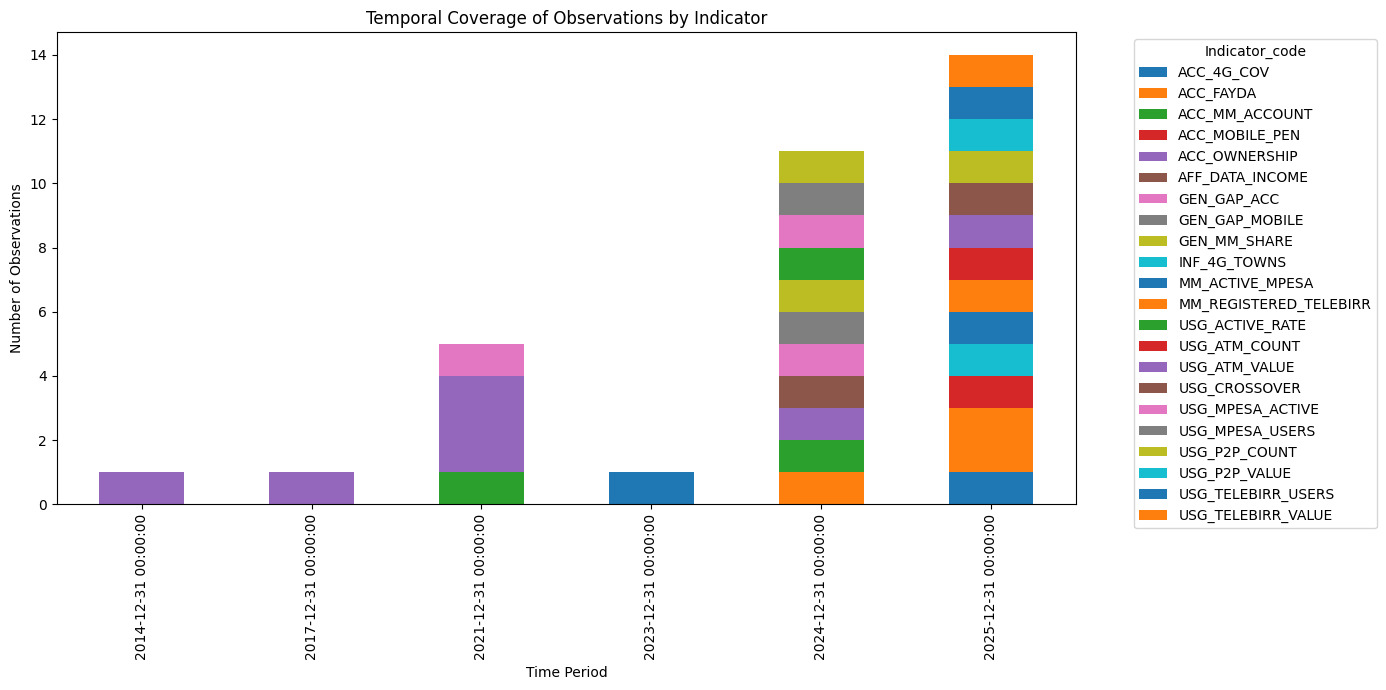

In [31]:
print("Last 10 rows (including new enrichments):")
display(data.df.tail(10))

print("\nUpdated temporal coverage plot:")
data.plot_temporal_coverage(freq='Y')

In [32]:
# Generate data_enrichment_log.md in project root
log_path = project_root / "data_enrichment_log.md"
log_content = """
# Task 1 Data Enrichment Log

**Collected by:** Gashaw
**Date:** 2026-01-31

## Summary
Added 4 high-confidence 2025 records:
- Telebirr registered users (54.84M, July 2025)
- M-Pesa 90-day active users (5M, Dec 2025)
- 4G towns coverage (1,030 towns, Dec 2025)
- NDPS 2026–2030 policy launch (Dec 2025)

## Purpose
Extend post-2024 time series with recent operator/infrastructure/policy data to improve forecasting for 2026-2027 Access and Usage indicators.

## Detailed Sources
All records include source_url, original_text, confidence, collected_by, collection_date, and notes in the enrichment cell above.

No corrections to existing starter data.
"""

with open(log_path, "w", encoding="utf-8") as f:
    f.write(log_content.strip() + "\n")

print(f"data_enrichment_log.md created successfully at: {log_path}")

data_enrichment_log.md created successfully at: C:\Users\Administrator\Desktop\10Academy\Week 10\Week10-ethiopia-fi-forecast\data_enrichment_log.md
